<a href="https://colab.research.google.com/github/abdulhaq555/Final-Year-Project-/blob/main/Heart_Attack_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Attack Risk Prediction Using Clinical and Biochemical Indicators**

### **Overview**
This project aims to **predict the risk of heart attack** using patients’ clinical and biochemical data,
including attributes such as age, gender, blood pressure, glucose level, CK-MB enzyme, and troponin level.

The goal is to preprocess the dataset, perform exploratory data analysis (EDA),
and prepare the data for machine learning classification models.

**Dataset:** Heart Attack Data (collected from clinical sources and normalized)

**Libraries Used:** pandas, numpy, matplotlib, seaborn, scikit-learn, scipy


In [19]:

# Import Required Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy import stats

# Display settings
#pd.set_option('display.max_columns', None)
#sns.set(style="whitegrid", palette="muted")


##  **Load the Dataset**

In this step, we load the heart attack dataset from the uploaded Excel file
and preview the first few rows to understand the data structure.


In [20]:

# Load Dataset


# For Google Colab: upload or mount file, then use path below
file_path = "/content/Heart attack data.xlsx"   # Change path if needed
data = pd.read_excel(file_path)

# Preview the data
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (1323, 9)


,Age,Gender,Heart Rate,Pressure High,Pressure Low,Glucose,KCM,Troponin,Output
0,64.0,1.0,66.0,160.0,83.0,160.0,1.80,0.012,0.0
1,21.0,1.0,94.0,98.0,46.0,296.0,6.75,1.060,1.0
2,55.0,1.0,64.0,160.0,77.0,270.0,1.99,0.003,0.0
3,64.0,1.0,70.0,120.0,55.0,270.0,13.87,0.122,1.0
4,55.0,1.0,64.0,112.0,65.0,300.0,1.08,0.003,0.0


##  **Explore Basic Information**

This section provides:
- Dataset structure (`.info()`)
- Summary statistics (`.describe()`)
- Missing value count


In [21]:

# Dataset Overview


print("\n--- Dataset Info ---")
data.info()




--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1321 non-null   float64
 1   Gender         1321 non-null   float64
 2   Heart Rate     1321 non-null   float64
 3   Pressure High  1321 non-null   float64
 4   Pressure Low   1321 non-null   float64
 5   Glucose        1321 non-null   float64
 6   KCM            1321 non-null   float64
 7   Troponin       1321 non-null   float64
 8   Output         1321 non-null   float64
dtypes: float64(9)
memory usage: 93.2 KB


In [22]:

print("\n--- Descriptive Statistics ---")
display(data.describe())



--- Descriptive Statistics ---


,Age,Gender,Heart Rate,Pressure High,Pressure Low,Glucose,KCM,Troponin,Output
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,56.195307,0.659349,75.943982,127.178653,72.305072,146.848372,15.478524,0.368194,0.613929
std,13.746835,0.474108,15.435198,26.340369,14.233817,75.711122,46.951999,1.185702,0.487032
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.650000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,170.000000,5.810000,0.086000,1.000000
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [23]:

print("\n--- Missing Values ---")
print(data.isnull().sum())


--- Missing Values ---
Age              2
Gender           2
Heart Rate       2
Pressure High    2
Pressure Low     2
Glucose          2
KCM              2
Troponin         2
Output           2
dtype: int64


##  **Handle Missing Values**

Missing values are imputed using the **mean strategy** for numerical features.
This ensures no missing data remains before training.


In [24]:

# Handle Missing Values


imputer = SimpleImputer(strategy='mean')
cols_to_impute = ['Age','Gender','Heart Rate', 'Pressure High', 'Pressure Low', 'Glucose', 'KCM', 'Troponin']
data[cols_to_impute] = imputer.fit_transform(data[cols_to_impute])

# Verify again
print("Missing values after imputation:\n", data.isnull().sum())


Missing values after imputation:
 Age              0
Gender           0
Heart Rate       0
Pressure High    0
Pressure Low     0
Glucose          0
KCM              0
Troponin         0
Output           2
dtype: int64


In [25]:
#  unique classes
print("Unique Output labels before encoding:", data['Output'].unique())


Unique Output labels before encoding: [ 0.  1. nan]


In [26]:
data = data.dropna(subset=['Output'])


print("Unique Output labels after cleaning:", data['Output'].unique())
print(data['Output'].value_counts())

Unique Output labels after cleaning: [0. 1.]
Output
1.0    811
0.0    510
Name: count, dtype: int64


##  **Encode Categorical Variables**

Convert the `Output` column (positive/negative) 1.into binary numeric labels:
- **1.0(positive) → 1**
- **0.0(negative) → 0**


In [27]:

# Encode Categorical Variables


label_encoder = LabelEncoder()
data['Output'] = label_encoder.fit_transform(data['Output'])

# Confirm encoding
data[['Output']].head()


,Output
0,0
1,1
2,0
3,1
4,0


##  **Outlier Detection and Removal**

Outliers are detected using the **Z-score method**.
Any data point with |Z| > 3 is considered an outlier and removed.


In [28]:

# Outlier Detection and Removal

numeric_cols = ['Age', 'Heart Rate', 'Pressure High', 'Pressure Low', 'Glucose', 'KCM', 'Troponin']
z_scores = np.abs(stats.zscore(data[numeric_cols]))

data = data[(z_scores < 3).all(axis=1)]

print("Dataset shape after removing outliers:", data.shape)


Dataset shape after removing outliers: (1198, 9)


##  **Feature Scaling (Normalization)**

Normalize all continuous features using **Min-Max Scaling** to the range [0, 1].
This ensures balanced feature influence during model training.


In [29]:

# Feature Scaling (Normalization)


scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Preview scaled data
data.head()


,Age,Gender,Heart Rate,Pressure High,Pressure Low,Glucose,KCM,Troponin,Output
0,0.625000,1.0,0.348837,0.683453,0.625000,0.375375,0.010056,0.002858,0
1,0.027778,1.0,0.674419,0.237410,0.111111,0.783784,0.043711,0.275136,1
2,0.500000,1.0,0.325581,0.683453,0.541667,0.705706,0.011348,0.000520,0
3,0.625000,1.0,0.395349,0.395683,0.236111,0.705706,0.092121,0.031437,1
4,0.500000,1.0,0.325581,0.338129,0.375000,0.795796,0.005160,0.000520,0


##  **Exploratory Data Analysis (EDA)**

In this step, we visualize:
- Distribution of the target variable
- Correlations among features
- Gender-based heart attack trends
- Boxplots for feature vs. outcome


/tmp/ipython-input-1406271367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Output', data=data, palette="coolwarm")


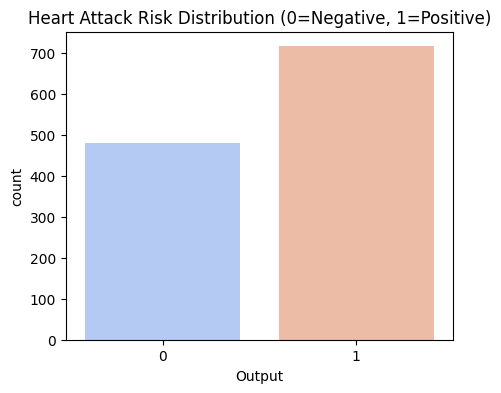

In [30]:

# EDA - Distribution & Correlation

# Output distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Output', data=data, palette="coolwarm")
plt.title('Heart Attack Risk Distribution (0=Negative, 1=Positive)')
plt.show()



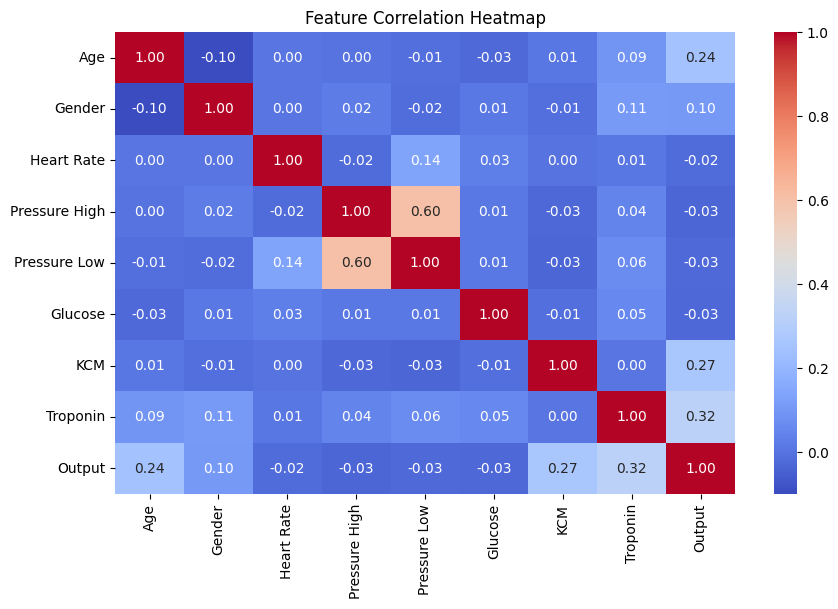

In [31]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

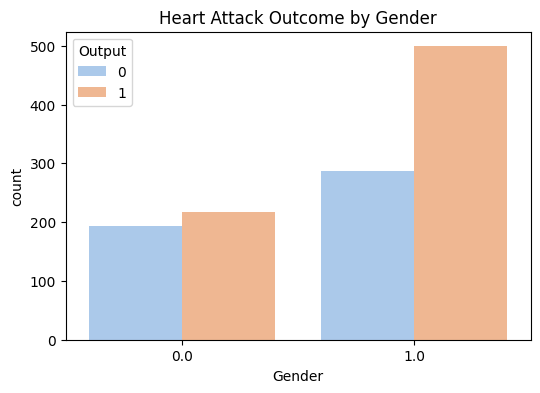

In [32]:

# Gender vs Outcome and Boxplots

# Gender vs Output
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Output', data=data, palette='pastel')
plt.title('Heart Attack Outcome by Gender')
plt.show()



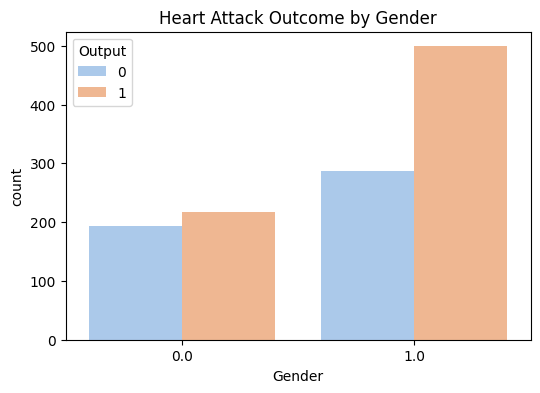

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


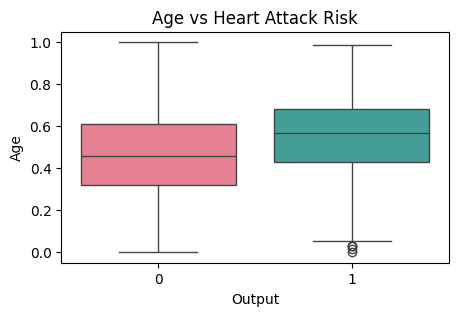

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


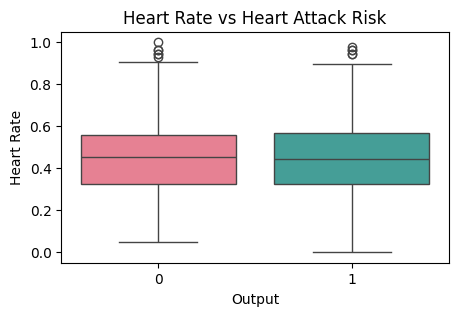

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


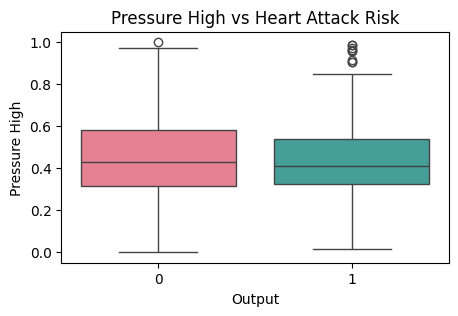

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


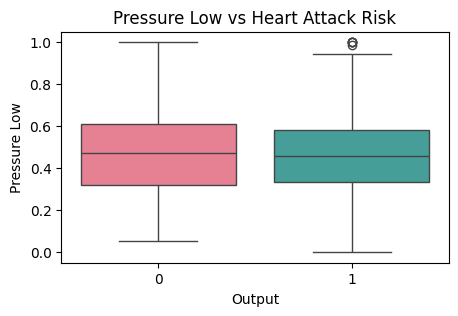

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


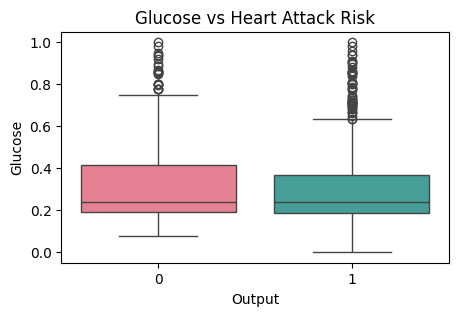

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


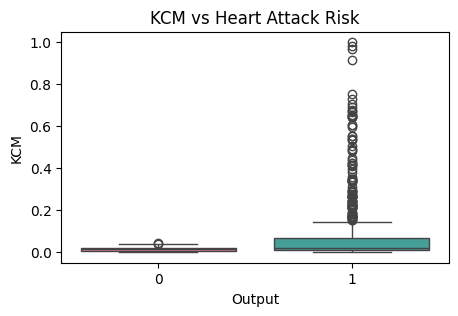

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


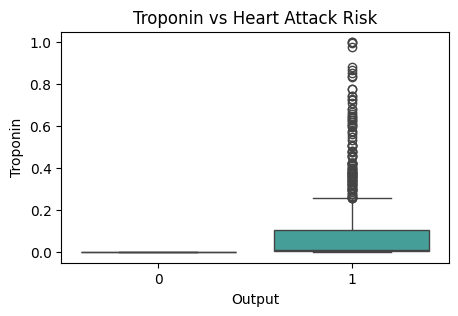

In [33]:

# Gender vs Outcome and Boxplots


# Gender vs Output
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Output', data=data, palette='pastel')
plt.title('Heart Attack Outcome by Gender')
plt.show()

# Boxplots for each feature
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Output', y=col, data=data, palette="husl")
    plt.title(f'{col} vs Heart Attack Risk')
    plt.show()
